# 2. 출생아 수 및 합계출산율

- 합계출산율 : 한 여자가 가임기간(15~49세)에 낳을 것으로 기대되는 평균 출생아 수
- [데이터 출처](https://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1428)

In [1]:
# pip install xlrd

In [2]:
import pandas as pd
df = pd.read_excel('stat_142801.xls', skiprows=2, nrows=2, index_col=0) # 첫 번째 줄은 column header 역할, nrows 에서 제외
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [4]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [5]:
df.index.values # 불필요한 문자열 포함

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [7]:
df.rename(index={'출생아\xa0수':'출생아 수', '합계\xa0출산율':'합계 출산율'}, inplace=True)
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [8]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [9]:
df.loc['출생아 수']

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [10]:
df.iloc[0]

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [11]:
df.iloc[1]

2011    1.244
2012    1.297
2013    1.187
2014    1.205
2015    1.239
2016    1.172
2017    1.052
2018    0.977
2019    0.918
2020    0.840
Name: 합계 출산율, dtype: float64

In [12]:
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [13]:
df = df.T
df

,출생아 수,합계 출산율
2011,471.3,1.244
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


In [14]:
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Window
# matplotlib.rcParams['font.family'] = 'KoPubBatang_Pro' # Apple
matplotlib.rcParams['font.family'] = 'AppleGothic' # Apple
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상 해결

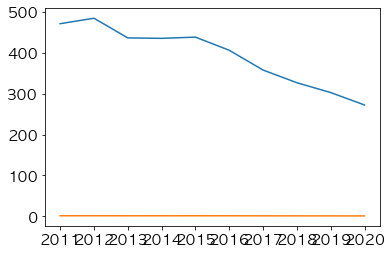

In [15]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

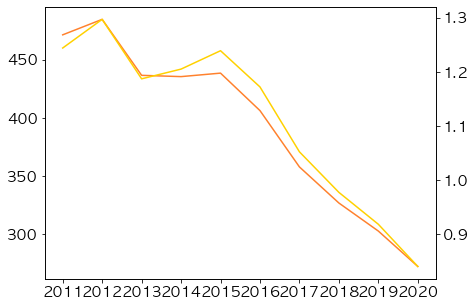

In [20]:
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.plot(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

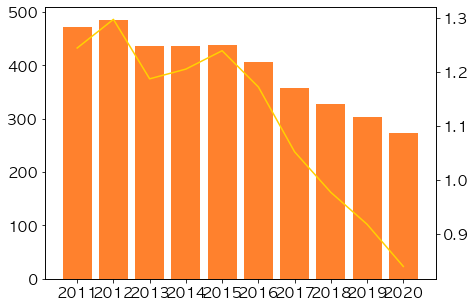

In [21]:
fig, ax1 = plt.subplots(figsize=(7, 5))
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

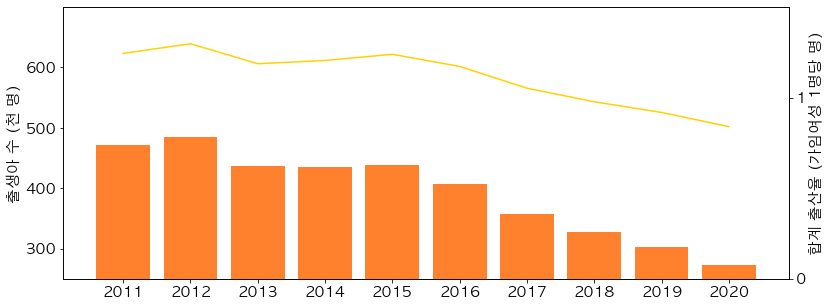

In [28]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

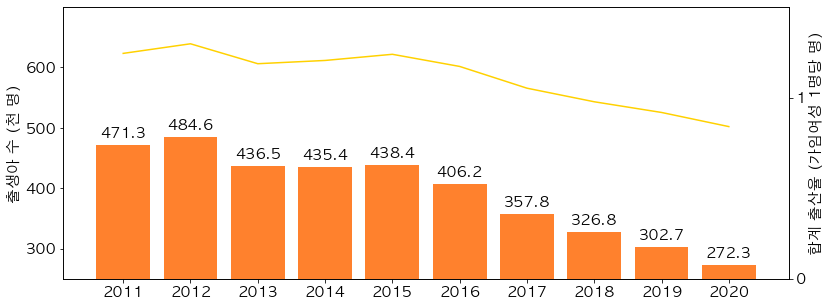

In [32]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

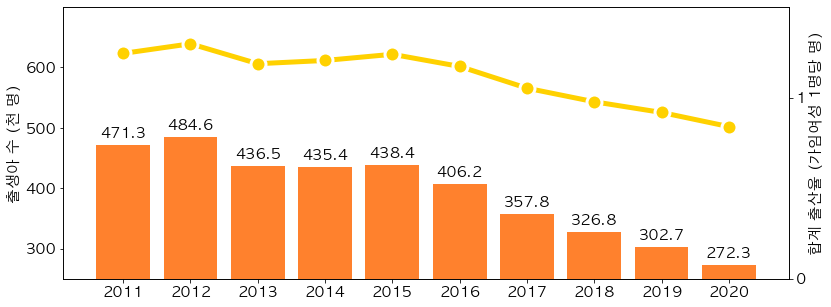

In [38]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)

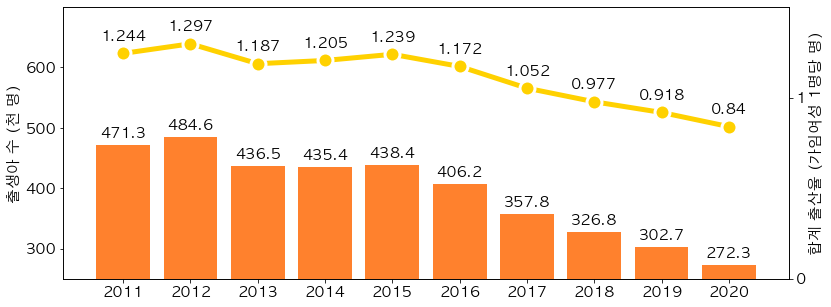

In [40]:
fig, ax1 = plt.subplots(figsize=(13, 5))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.07, val, ha='center')

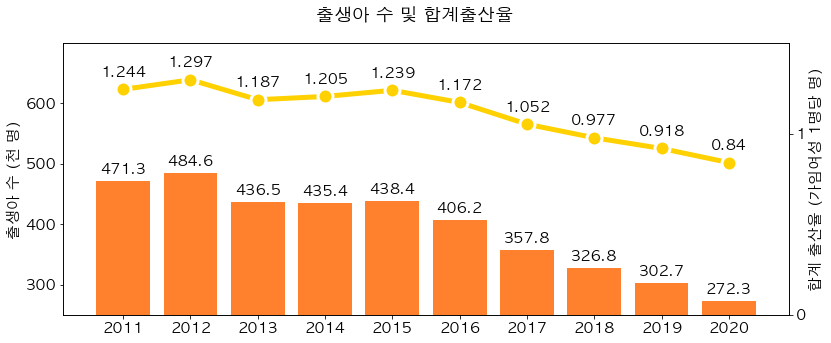

In [42]:
fig, ax1 = plt.subplots(figsize=(13, 5))
fig.suptitle('출생아 수 및 합계출산율') # subplot은 super title

ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']):
    ax1.text(idx, val + 12, val, ha='center')

ax2 = ax1.twinx() # x 축을 공유하는 쌍둥이 axis, y 축 범주는 다르게 사용
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val + 0.07, val, ha='center')